![](https://drive.google.com/uc?export=view&id=1NiRkCapP04t7XxA7fbG7ZWie2PA1L_0M)

# **Tarea 2: Evaluación del desempeño con *Scikit-Learn***
---

En esta tarea deberá entrenar un modelo de clasificación para el [conjunto de datos de vinos _Wine_](https://archive.ics.uci.edu/ml/datasets/wine) del repositorio de la *UCI* usando *Scikit-learn*.

El conjunto de datos cuenta con información de análisis químico en lotes de vinos cosechados en la misma región de Italia en $3$ cultivos distintos.


| Variable | Medida	| Valores | 
| --- | --- | --- |
| alcohol | 	Porcentaje de alcohol. | 	numérico |
| malic_acid 	|  Ácido málico. | 	numérico
| ash 	| Cenizas (restos inorgánicos). 	| numérico|
| alcalinity_of_ash |	Alcalinidad de la ceniza. 	| numérico|
| magnesium |	Magnesio. 	| numérico|
| total_phenols |	Fenoles totales. 	| numérico|
| flavanoids |	 Flavonoides. 	| numérico|
| nonflavanoid_phenols |	Fenoles no flavonoides. 	| numérico|
| proanthocyanins |	Proantocianidinas. 	| numérico|
| color_intensity |	Intensidad del color. 	| numérico|
| hue |	Tonalidad del color. 	| numérico|
| od280/od315_of_diluted_wines |	 Concentración de proteínas (OD280/OD315). 	| numérico|
| proline |	Prolino. 	| numérico|



> **Nota:** Esta tarea va a ser calificada en la plataforma **[UNCode](https://juezun.github.io/)**. Para esto, en cada ejercicio se indicará si es calificable o no, también los lugares donde debe escribir su código sin modificar lo demás con un aproximado de cantidad de líneas a escribir. No se preocupe si su código toma más líneas, esto es simplemente un aproximado destinado a que pueda replantear su estrategia si el código está tomando más de las esperadas. No es un requisito estricto y soluciones más largas también son válidas. Al finalizar, para realizar el envío (*submission*), descargue el notebook como un archivo **`.ipynb`** y haga su entrega a través de **Moodle**.
>
> **La tarea es incremental, es recomendable resolver los puntos en orden.**


Ejecute la siguiente celda para importar y configurar las librerías usadas:

In [1]:
# Actualizamos a la última versión disponible de scikit-learn.
import sklearn

# Librerías de utilidad para manipulación y visualización de datos.
from numbers import Number
import numpy as np
import pandas as pd

In [2]:
#TEST_CELL
# Configuramos el formato por defecto de la 
# librería de visualización Matplotlib.
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 110
mpl.rcParams['figure.figsize'] = (8, 6)
sns.set_theme()

In [3]:
#TEST_CELL
# Versiones de las librerías usadas.

!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.7.14
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.11.2
Scikit-learn 1.0.2


Esta actividad se realizó con las siguientes versiones:
*  *Python*: 3.7.10
*  *NumPy*:  1.19.5
*  *Pandas*: 1.1.5
*  *Matplotlib*:  3.2.2
*  *Seaborn*:  0.11.1
*  *Scikit-learn*: 0.22.2.post1

## **1. Cargar *Wine* en formato X, y**
-------
Antes de comenzar el proceso de modelado deberá identificar el conjunto de datos discutido y cargarlo en el formato adecuado.

Complete la función **`load_X_y`** de tal manera que cargue el conjunto de datos *Wine* en el formato **`X, y`**.
El arreglo **`X`** debe corresponder a las características del conjunto de datos y **`y`** a las etiquetas.

**Salida**:
* **`X`**: arreglo de *NumPy* de $2$ dimensiones con las variables de entrada del conjunto de datos *Wine* (medidas de concentraciones de sustancias químicas en cosechas de vino).
* **`y`**: arreglo de *NumPy* de $1$ dimensión con la variable de salida del conjunto de datos *Wine* (cultivo al que pertenece la medida).

In [4]:
# FUNCIÓN CALIFICADA load_X_y:

# Módulo necesario para realizar el ejercicio.
from sklearn import datasets

def load_X_y():
  """
  Retorna:
    X: arreglo de NumPy de tamaño (150, 4) que representa las 
            variables de entrada del conjunto Wine. 
    y: arreglo de NumPy de tamaño (150,) que representa la variable 
            de salida (etiqueta).
  """
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 1 línea de código)
  
  X, y = datasets.load_wine(return_X_y=True)
  
  ### FIN DEL CÓDIGO ###

  return X, y

Use la siguiente celda para probar su función:

In [5]:
#TEST_CELL
X, y = load_X_y()

if isinstance(X, np.ndarray) and isinstance(y, np.ndarray):
  print("El shape de X es:", X.shape)
  print("El shape de y es:", y.shape)
else: 
  print("El tipo de los objetos es incorrecto.")

El shape de X es: (178, 13)
El shape de y es: (178,)


**Salida esperada:**
 
 ```
El shape de X es: (178, 13)
El shape de y es: (178,)
```

In [6]:
#TEST_CELL
if isinstance(y, np.ndarray):
  print(np.bincount(y)) # Conteo de repeticiones por clase.
else: 
  print("El tipo del objetos 'y' es incorrecto.")

[59 71 48]


**Salida esperada:**
 
 ```
[59 71 48]
```

Ejecute la siguiente celda (después de completar el punto anterior) para visualizar la distribución de etiquetas del conjunto de datos Iris.

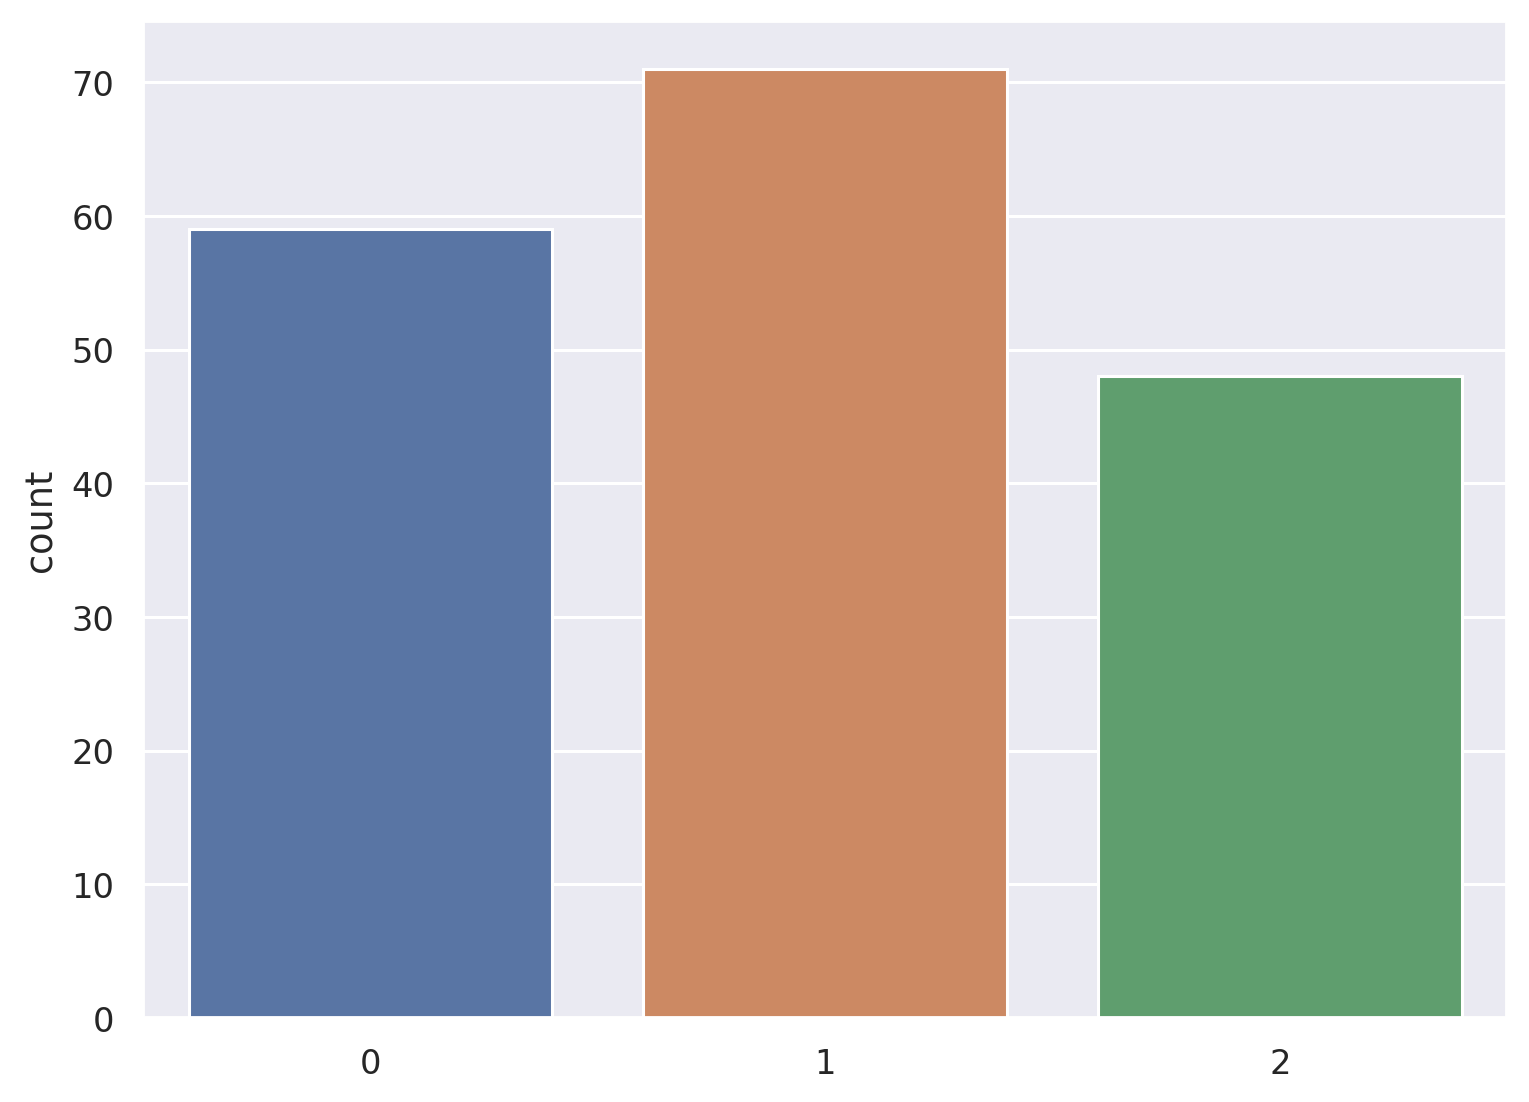

In [7]:
#TEST_CELL
X, y = load_X_y()
sns.countplot(x = y);

Debería ver un conjunto de datos ligeramente desbalanceado con $178$ ejemplos.

**Salida esperada**:

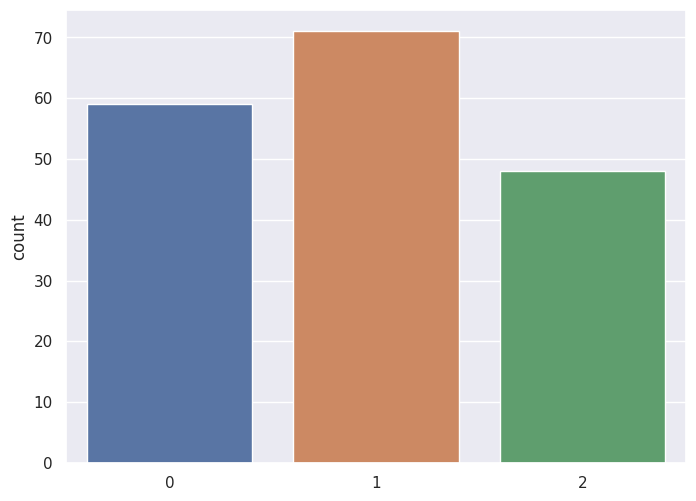

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Consulte la [lista de conjuntos de datos](https://scikit-learn.org/stable/datasets/toy_dataset.html) disponibles como *loaders* en el módulo **`sklearn.datasets`**.


## **2. Problema de clasificación binaria**
---
En esta actividad abordaremos primero el *dataset* como un problema de clasificación binaria, y más adelante, uno de clasificación multiclase.

Complete la función **`bin_X_y`**, que seleccione solo los ejemplos de la clase $0$ y $1$ tanto para **`X`** como para **`y`** y retorne los dos conjuntos reducidos. **El orden de los datos conservados se debe mantener**.

**Entrada**:

* **`X`**: arreglo de *NumPy* de tamaño $(n, m)$.
* **`y`**: arreglo de *NumPy* de tamaño $(n, )$.


**Salida**:
* **`X_bin`**:  arreglo de *NumPy* de tamaño $(n^\prime, m)$ con los registros de **`X`** que correspondan a las clases $0$ y $1$ del vector de etiquetas **`y`**.
* **`y_bin`**:  arreglo de *NumPy* de tamaño $(n^\prime,)$ con los registros del vector de etiquetas **`y`** que correspondan a las clases $0$ y $1$.


In [8]:
# FUNCIÓN CALIFICADA bin_X_y:

def bin_X_y(X, y):
    """
    X: una matriz de datos, arreglo de NumPy de tamaño (n, m)
    y: un vector de etiquetas, arreglo de NumPy de tamaño (n,)    

  Retorna:     
    X_bin:  arreglo de NumPy de tamaño (n', m) con los registros de X que 
            correspondan a las clases  0  y  1  del vector de etiquetas y.
    y_bin:  arreglo de NumPy de tamaño (n',) con los registros del vector
            de etiquetas y que correspondan a las clases 0 y  1.
    """

    ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 2 líneas de código)
  
    X_bin = X[(y==0) | (y==1)]
    y_bin = y[(y==0) | (y==1)]
  
    ### FIN DEL CÓDIGO ###
    return X_bin, y_bin

Use la siguiente celda para probar su función:

In [9]:
#TEST_CELL
X2 = np.arange(40).reshape(10, 4)
y2 = np.array([1, 0, 2, 1, 0, 2, 0, 2, 2, 0])

X_bin, y_bin = bin_X_y(X2, y2)

if isinstance(X_bin, np.ndarray) and isinstance(y_bin, np.ndarray):
  print("El shape de X_bin es:", X_bin.shape)
  print("El shape de y_bin es:", y_bin.shape)
else: 
  print("El tipo de los objetos es incorrecto.")

El shape de X_bin es: (6, 4)
El shape de y_bin es: (6,)


**Salida esperada:**
 
 ```
El shape de X_bin es: (6, 4)
El shape de y_bin es: (6,)
```

In [10]:
#TEST_CELL
X2 = np.arange(40).reshape(10, 4)
y2 = np.array([1, 0, 2, 1, 0, 2, 0, 2, 2, 0])

X_bin, y_bin = bin_X_y(X2, y2)

if isinstance(X_bin, np.ndarray):
  print(X_bin)
else: 
  print("El tipo del objeto 'X_bin' es incorrecto.")

[[ 0  1  2  3]
 [ 4  5  6  7]
 [12 13 14 15]
 [16 17 18 19]
 [24 25 26 27]
 [36 37 38 39]]


**Salida esperada:**
 
 ```
[[ 0  1  2  3]
 [ 4  5  6  7]
 [12 13 14 15]
 [16 17 18 19]
 [24 25 26 27]
 [36 37 38 39]]
```

In [11]:
#TEST_CELL
X2 = np.arange(40).reshape(10, 4)
y2 = np.array([1, 0, 2, 1, 0, 2, 0, 2, 2, 0])

X_bin, y_bin = bin_X_y(X2, y2)

if isinstance(y_bin, np.ndarray):
  print(y_bin)
else: 
  print("El tipo del objeto 'y_bin' es incorrecto.")

[1 0 1 0 0 0]


**Salida esperada:**
 
 ```
[1 0 1 0 0 0]
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>


* En *NumPy* se puede realizar selección condicional con la siguiente sintaxis: **`X[cond]`**, donde **`cond`** corresponde a un arreglo de valores booleanos con el mismo tamaño en la dimensión $0$ (filas).


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>


* En *NumPy* se puede realizar selección condicional de valores específicos con la siguiente sintaxis: **`X[X op a]`**, donde **`op`** corresponde a un operador lógico (**`==`**, **`!=`**,  **`>`**,  **`>=`**,  **`<`**,  **`<=`**, etc).


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 3</b></font>
</summary>


* Debería usar los valores condicionales de las clases del vector de etiquetas **`y`** para seleccionar los valores tanto en el arreglo **`y`** como en  **`X`**.


##  **3. Generar particiones de entrenamiento y prueba con estratificación**
---
Cuando se trata con datos con clases desbalanceadas se corre el riesgo de que los resultados obtenidos se vean alterados por el sesgo de muestreo. Al realizar una partición aleatoria se considera buena práctica definir un criterio de estratificación, como el uso de clases o características categóricas para preservar la frecuencia relativa de aparición de cada clase en los subconjuntos generados.

Complete la función **`get_stratified_split`** de tal manera que haga una partición de los datos en los conjuntos de entrenamiento y prueba estratificados por las clases del vector de etiquetas usando *Scikit-learn*. 

> **Nota:** La función creada deberá aceptar un argumento para definir el tamaño relativo de la partición de prueba (**`p`**) y otro para definir la semilla aleatoria (**`random_state`**) para garantizar la reproducibilidad.

**Entrada**:

* **`X`**: arreglo de *NumPy* de tamaño $(n, m)$.
* **`y`**: arreglo de *NumPy* de tamaño $(n, )$.
* **`p`**: número real entre $0$ y $1$ con la proporción correspondiente a la partición de prueba.
* **`random_state`**: número real con la semilla aleatoria para la generación de la partición.

**Salida**:
* **`X_train`**: arreglo de *NumPy* con *shape* aproximado $(n\cdot (1-p), m)$ para la partición de entrenamiento de **`X`**.
* **`X_test`**:  arreglo de *NumPy* con *shape* aproximado $(n\cdot p, m)$ para la partición de prueba de **`X`**.
* **`y_train`**: arreglo de *NumPy* con *shape* aproximado $(n \cdot (1-p),)$ para la partición de entrenamiento de **`y`**.
* **`y_test`**:  arreglo de *NumPy* con *shape* aproximado $(n\cdot p,)$ para la partición de prueba de **`y`**.

In [12]:
# FUNCIÓN CALIFICADA get_stratified_split:

# Módulo necesario para realizar el ejercicio.
from sklearn import model_selection

def get_stratified_split(X, y, 
# ¡No modifique los valores por defecto de los argumentos!
              p=0.3, random_state=42): 
  """
    X: matriz de datos, arreglo de NumPy con shape (n, m).
    y: vector de etiquetas, arreglo de NumPy con shape (n,).
    p: proporción de los datos para la partición de prueba,
       número real entre 0 y 1.
    random_state: semilla aleatoria.

  Retorna: 
    X_train: arreglo de NumPy con shape aproximado (n(1 - p), m) 
              para la partición de entrenamiento de X.
    X_test:  arreglo de NumPy con shape aproximado (n(p), m) 
              para la partición de prueba de X.
    y_train: arreglo de NumPy con shape aproximado (n(1 - p),) 
              para la partición de entrenamiento de y.
    y_test:  arreglo de NumPy con shape aproximado (n(p),) 
              para la partición de prueba de y.
  """
  ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 2 líneas de código)
  
  X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                      y, 
                                                                      test_size=p, 
                                                                      stratify=y, 
                                                                      random_state=random_state)

  ### FIN DEL CÓDIGO ###

  return X_train, X_test, y_train, y_test

Use la siguiente celda para probar su partición:

In [13]:
#TEST_CELL
X3 = np.arange(500).reshape(100, 5)
y3 = np.repeat([0,1], [25, 75])

X_train, X_test, y_train, y_test = get_stratified_split(X3, y3)

if np.all([isinstance(p, np.ndarray) for p in (X_train, X_test, y_train, y_test)]):
  print('I. Partición de entrenamiento:\n')

  print(f"Tamaño de X: {X_train.shape}")
  print(f"Primeros 5 valores de X:")
  print(X_train[:5, :])

  print(f"Primeros 5 valores de y: {y_train[:5]}")
  print(f"Valores únicos de y:", np.bincount(y_train))

  print('\nII. Partición de prueba:\n')
  print(f"Tamaño de X: {X_test.shape}")

  print(f"Primeros 5 valores de X:")
  print(X_test[:5, :])
  print(f"Primeros 5 valores de y: {y_test[:5]}")
  print(f"Valores únicos de y:", np.bincount(y_test))
else:
  print("Alguno de los objetos asignado no es un arreglo de NumPy válido.")

I. Partición de entrenamiento:

Tamaño de X: (70, 5)
Primeros 5 valores de X:
[[390 391 392 393 394]
 [495 496 497 498 499]
 [370 371 372 373 374]
 [260 261 262 263 264]
 [295 296 297 298 299]]
Primeros 5 valores de y: [1 1 1 1 1]
Valores únicos de y: [17 53]

II. Partición de prueba:

Tamaño de X: (30, 5)
Primeros 5 valores de X:
[[405 406 407 408 409]
 [ 90  91  92  93  94]
 [460 461 462 463 464]
 [100 101 102 103 104]
 [440 441 442 443 444]]
Primeros 5 valores de y: [1 0 1 0 1]
Valores únicos de y: [ 8 22]


**Salida esperada**:

```
I. Partición de entrenamiento:

Tamaño de X: (70, 5)
Primeros 5 valores de X:
[[390 391 392 393 394]
 [495 496 497 498 499]
 [370 371 372 373 374]
 [260 261 262 263 264]
 [295 296 297 298 299]]
Primeros 5 valores de y: [1 1 1 1 1]
Valores únicos de y: [17 53]

II. Partición de prueba:

Tamaño de X: (30, 5)
Primeros 5 valores de X:
[[405 406 407 408 409]
 [ 90  91  92  93  94]
 [460 461 462 463 464]
 [100 101 102 103 104]
 [440 441 442 443 444]]
Primeros 5 valores de y: [1 0 1 0 1]
Valores únicos de y: [ 8 22]
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>


* Utilice la función [**`train_test_split`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) del módulo **`sklearn.model_selection`** tal como se vio en el taller guiado de la **Unidad 1**.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>


* El argumento **`p`** permite definir la cantidad de datos usados para el subconjunto de pruebas. Si tiene problemas con el tamaño de la partición puede hacer falta usar este argumento en el llamado de la función de generación de particiones.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 3</b></font>
</summary>


* Considere el argumento **`random_state`** de su función y úselo como argumento de la función de generación de particiones de *Scikit-learn*. Como la partición se hace con un proceso aleatorio, omitir este argumento produciría un valor distinto cada vez que se ejecute.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 4</b></font>
</summary>


* No olvide indicar a *Scikit-Learn* el arreglo sobre el cual debe realizar la estratificación. Esto se puede hacer con el argumento **`stratify`** de **`train_test_split`**.


## **4. Entrenamiento de un clasificador de $k$ vecinos más cercanos**
---
Para esta tarea utilizaremos un clasificador basado en el algoritmo de $k$ vecinos más cercanos. Este debe permitir el uso de datos binarios y multiclase en el proceso de entrenamiento.

Escriba la función **`clasificador_knn`** que reciba como datos de entrada las características **`X`** y sus respectivas etiquetas **`y`**. Además, construya un clasificador **`KNeighborsClassifier`** que considere los **`k`** vecinos más cercanos.

**Entrada**:
* **`X`**: arreglo de *NumPy* de tamaño $(n, m)$.
* **`y`**: arreglo de *NumPy* de tamaño $(n, )$.
* **`k`**: número entero mayor o igual a $1$ con el número de vecinos a considerar en el algoritmo *KNN*.

**Salida**:
* **`knn`**: modelo de clasificación basado en el algoritmo *KNN* entrenado a partir de los datos de entrada (características **`X`** y etiquetas **`y`**).


In [14]:
# FUNCIÓN CALIFICADA clasificador_knn:

# Módulo necesario para realizar el ejercicio.
from sklearn import neighbors

def clasificador_knn(X, y, k):
    """
     X: arreglo de NumPy de shape (n, m) con las características.
     y: arreglo de NumPy de shape (n,) con las etiquetas de clase.
     k: número entero, el número de vecinos más cercanos a considerar.
    Retorna:
     knn: Clasificador de los k vecinos más cercanos entrenado con X y y.
    """
    ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 2 líneas de código)
  
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    ### FIN DEL CÓDIGO ###
    return knn

Use las siguientes celdas para probar su función:

In [15]:
#TEST_CELL
X4, y4 = datasets.make_blobs(centers = 2, random_state = 4)

bin_clf = clasificador_knn(X4[:75], y4[:75], 2)
if isinstance(bin_clf, sklearn.neighbors._classification.KNeighborsClassifier):
  print(bin_clf.score(X4[75:], y4[75:]))

0.92


**Salida esperada**:
```
0.92
```

In [16]:
#TEST_CELL
X4, y4 = datasets.make_blobs(centers = 2, random_state = 4)

bin_clf = clasificador_knn(X4[:75], y4[:75], 2)
if isinstance(bin_clf, sklearn.neighbors._classification.KNeighborsClassifier):  
  print(bin_clf.predict(X4[75:]))

[0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0]


**Salida esperada**:
```
[0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0]
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>


* Utilice el constructor **`KNeighborsClassifier`** del módulo **`sklearn.neighbor`** tal como se vio en el taller guiado de la **Unidad 2**.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* No olvide entrenar su modelo con la función **`fit`**. De lo contrario, es posible que la predicción de la celda de pruebas falle.


## **5. Falsos positivos y falsos negativos**
----
Al obtener las predicciones de un modelo de clasificación binaria se pueden presentar dos tipos de error. El primero consiste en aceptar como positiva una observación que no debería (**falso positivo**) y el segundo en rechazar una observación que sí debía ser aceptada (**falso negativo**).

Desarrolle la función **`fp_fn`** para que calcule el número de falsos positivos y el número de falsos negativos que un clasificador binario (no necesariamente basado en *KNN*) produce sobre un conjunto de datos dado. 

> En este caso un falso positivo es un ejemplo que es realmente de la clase $0$ pero es clasificado en la clase $1$ y un falso negativo es un ejemplo que es realmente de la clase $1$ pero es clasificado en la clase $0$.

**Entrada**:
  * **`clf`**: clasificador binario de *Scikit-Learn* entrenado.
  * **`X`**: arreglo de *NumPy* de tamaño $(n, m)$ usado para la evaluación.
  * **`y`**: arreglo de *NumPy* de tamaño $(n, )$ usado para la evaluación.

**Salida**:

  * **`fp`**: falsos positivos de las predicciones de **`clf`** sobre **`X`** y las etiquetas reales **`y`**.
  * **`fn`**: falsos negativos de las predicciones de **`clf`** sobre **`X`** y las etiquetas reales **`y`**.

In [17]:
# FUNCIÓN CALIFICADA fp_fn:

# Módulo necesario para realizar el ejercicio.
from sklearn import metrics

def fp_fn(clf, X, y):
    """
     clf: clasificador binario entrenado.
     X: arreglo de NumPy de tamaño (n, m) con las características.
     y: arreglo de NumPy de tamaño (n,) con las etiquetas de clase.
    Retorna:
     fp: falsos positivos de las predicciones de clf sobre X y las etiquetas reales y.
     fn: falsos negativos de las predicciones de clf sobre X y las etiquetas reales y.
    """
    ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 3-4 líneas de código)
    y_pred = clf.predict(X)
    cnf_matrix = metrics.confusion_matrix(y, y_pred)
    fp, fn = cnf_matrix[0,1], cnf_matrix[1,0]

    ### FIN DEL CÓDIGO ###
    return fp, fn

Use la siguiente celda para probar su función:

In [18]:
#TEST_CELL
from sklearn.linear_model import LogisticRegression

X5, y5 = datasets.make_circles(random_state = 8)
clf = LogisticRegression().fit(X5[:50], y5[:50])

fp, fn = fp_fn(clf, X5[:50], y5[:50])
print(f"Falsos positivos en entrenamiento: {fp}")
print(f"Falsos negativos en entrenamiento: {fn}")

Falsos positivos en entrenamiento: 6
Falsos negativos en entrenamiento: 16


**Salida esperada**:
```
Falsos positivos en entrenamiento: 6
Falsos negativos en entrenamiento: 16
```

In [19]:
#TEST_CELL
from sklearn.linear_model import LogisticRegression

X5, y5 = datasets.make_circles(random_state = 8)
clf = LogisticRegression().fit(X5[:50], y5[:50])

fp, fn = fp_fn(clf, X5[50:], y5[50:])
print(f"Falsos positivos en pruebas: {fp}")
print(f"Falsos negativos en pruebas: {fn}")

Falsos positivos en pruebas: 11
Falsos negativos en pruebas: 19


**Salida esperada**:
```
Falsos positivos en pruebas: 11
Falsos negativos en pruebas: 19
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>


* Puede obtener el valor de falsos positivos y falsos negativos a partir de la matriz de confusión obtenida del vector **`y`** y el vector de etiquetas predichas a partir de **`X`**. Deberá seleccionar las celdas correspondientes a cada valor y asignarlo a la variable correspondiente.


## **6. Métricas de desempeño binarias**
----
Al desarrollar un modelo de clasificación binaria se puede recurrir a la evaluación por métricas distintas a la exactitud o *accuracy* que reflejen más información acerca de el desempeño con respecto a las clases predichas.

Desarrolle la función **`métricas_binarias`** que calcule la precisión, el *recall* y la métrica $F_1$ de las predicciones hechas por un clasificador binario sobre un conjunto de datos dado. 
> Recuerde que en este caso la etiqueta positiva es la clase $1$.

**Entrada**:
  * **`clf`**: clasificador binario de *Scikit-Learn* entrenado.
  * **`X`**: arreglo de *NumPy* de tamaño $(n, m)$ usado para la evaluación.
  * **`y`**: arreglo de *NumPy* de tamaño $(n, )$ usado para la evaluación.

**Salida**:

  * **`prec`**: número real, métrica de precisión binaria.
  * **`rec`**: número real, métrica de _recall_ binaria.
  * **`f1`**:  número real, métrica _$F_1$-score_ binaria.

In [20]:
# FUNCIÓN CALIFICADA métricas_binarias:

# Módulo necesario para realizar el ejercicio.
from sklearn import metrics

def métricas_binarias(clf, X, y):
    """
      clf: clasificador entrenado,
      X: arreglo de NumPy de tamaño (n, m) con las características.
      y: arreglo de NumPy de tamaño (n,) con las etiquetas de clase.
    Retorna:
      prec: número real, métrica de precisión binaria.
      rec: número real, métrica de recall binaria.
      f1:  número real, métrica f1-score binaria.
    """
    ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 3-4 líneas de código)
    y_pred = clf.predict(X)

    prec, rec, f1 = metrics.precision_score(y, y_pred, pos_label=1), metrics.recall_score(y, y_pred, pos_label=1), metrics.f1_score(y, y_pred, pos_label=1)

    ### FIN DEL CÓDIGO ###

    return prec, rec, f1

Use la siguiente celda para probar su función:

In [21]:
#TEST_CELL
from sklearn.linear_model import LogisticRegression

X6, y6 = datasets.make_classification(random_state = 8)
bin_clf6 = LogisticRegression().fit(X6[:50], y6[:50])
prec, rec, f1 = métricas_binarias(bin_clf6, X6[:50], y6[:50])

if np.all([isinstance(x, Number) for x in [prec, rec, f1]]):  
  print("Precisión en entrenamiento: \t{:.4f}".format(prec))
  print("Recall en entrenamiento: \t{:.4f}".format(rec))
  print("F1 en entrenamiento: \t\t{:.4f}".format(f1))
else: print("Alguno de los valores retornados no es un número válido.")

Precisión en entrenamiento: 	0.9615
Recall en entrenamiento: 	0.9615
F1 en entrenamiento: 		0.9615


**Salida esperada**:
```
Precisión en entrenamiento: 	0.9615
Recall en entrenamiento: 	   0.9615
F1 en entrenamiento: 		   0.9615
```

In [22]:
#TEST_CELL
from sklearn.linear_model import LogisticRegression

X6, y6 = datasets.make_classification(random_state = 8)
bin_clf6 = LogisticRegression().fit(X6[:50], y6[:50])
prec, rec, f1 = métricas_binarias(bin_clf6, X6[50:], y6[50:])

if np.all([isinstance(x, Number) for x in [prec, rec, f1]]):  
  print("Precisión en prueba: \t{:.4f}".format(prec))
  print("Recall en prueba: \t{:.4f}".format(rec))
  print("F1 en prueba: \t\t{:.4f}".format(f1))
else: print("Alguno de los valores retornados no es un número válido.")

Precisión en prueba: 	0.6333
Recall en prueba: 	0.7600
F1 en prueba: 		0.6909


**Salida esperada**:
```
Precisión en prueba:    0.6333
Recall en prueba:       0.7600
F1 en prueba:           0.6909
```

Para probar la función vamos a entrenar un clasificador para las $2$ primeras clases originales del conjunto de datos *Wine*. 
> **Nota**: El resultado de esta celda depende de la correctitud de los primeros puntos de esta tarea. Revise primero los puntos $1$, $2$, $3$ y $4$ para evaluar esta celda.

In [23]:
#TEST_CELL
from sklearn.utils.validation import check_is_fitted
# 1. Cargar Wine en formato X, y
X6, y6 = load_X_y()
assert isinstance(X6, np.ndarray) and isinstance(y6, np.ndarray), "Revise el ejercicio 1"

# 2. Problema de clasificación binaria
X6, y6 = bin_X_y(X6, y6)
assert isinstance(X6, np.ndarray) and isinstance(y6, np.ndarray), "Revise el ejercicio 2"

# 3. Generar particiones de entrenamiento y prueba con estratificación
X6_train, X6_test, y6_train, y6_test = get_stratified_split(X6, y6)
assert np.all([isinstance(par, np.ndarray) 
       for par in (X6_train, X6_test, y6_train, y6_test)]), "Revise el ejercicio 3"

# 4. Entrenamiento de un clasificador de  k  vecinos más cercanos
clf6 = clasificador_knn(X6_train, y6_train, k = 1)
check_is_fitted(clf6)
assert isinstance(clf6, sklearn.neighbors._classification.KNeighborsClassifier), "Revise el ejercicio 4"

prec, rec, f1 = métricas_binarias(clf6, X6_test, y6_test)

if np.all([isinstance(x, Number) for x in [prec, rec, f1]]):  
  print("Precisión en prueba: \t{:.4f}".format(prec))
  print("Recall en prueba: \t{:.4f}".format(rec))
  print("F1 en prueba: \t\t{:.4f}".format(f1))
else: print("Alguno de los valores retornados no es un número válido.")

Precisión en prueba: 	0.8636
Recall en prueba: 	0.9048
F1 en prueba: 		0.8837


**Salida esperada:**

```
Precisión en prueba:    0.8636
Recall en prueba:       0.9048
F1 en prueba:           0.8837
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>


* Utilice los métodos **`precision_score`**, **`recall_score`** y **`f1_score`** del módulo **`sklearn.metrics`**.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>


* Para utilizar los métodos deberá realizar la predicción a partir del arreglo **`X`** y evaluar el desempeño con respecto al vector real de etiquetas **`y`**.


## **7. Métricas de desempeño multiclase**
----
Cuando se desarrolla un clasificador en el contexto de un problema multiclase, es importante considerar el desempeño general con formas de promediar la métrica obtenida por cada pareja de clases al considerarlas subproblemas de clasificación binaria.

Desarrolle la función **`métrica_multiclase`** que calcule la métrica precisión, _recall_ o _F1_ según el tipo de métrica **`metric_type`**, y que realice la agregación de las submétricas por medio del tipo de operación de promedio **`avg_type`**. El resultado de esta métrica se debe obtener a partir de los vectores de etiquetas reales (**`y_real`**) y predichas por un modelo (**`y_pred`**).

**Entrada**:
  * **`y_real`**: arreglo de *NumPy* de tamaño $(n, )$ con las etiquetas reales.
  * **`y_pred`**: arreglo de *NumPy* de tamaño $(n, )$ con las etiquetas predichas por un modelo de clasificación.
  * **`metric_type`**: cadena de texto con el tipo de métrica a calcular. Esta debe ser una de estas cadenas:
    ```python
    ['f1', 'recall', 'precision']
    ```
  * **`avg_type`**: cadena de texto con el tipo de operación usada para calcular el promedio de las métricas binarias individuales. Esta debe ser una de estas cadenas:
      ```python
    ['macro', 'micro', 'weighted']
    ```

**Salida**:

  * **`score`**: número real, métrica de tipo **`metric_type`** con promedio **`avg_type`** calculada sobre las etiquetas **`y_real`** y **`y_pred`**.


In [24]:
# FUNCIÓN CALIFICADA métrica_multiclase:

# Módulo necesario para realizar el ejercicio.
from sklearn import metrics

def métrica_multiclase(y_pred, y_real, metric_type, avg_type):
    """
     y_real: arreglo de NumPy de shape (n,) con las etiquetas reales.
     y_pred: arreglo de NumPy de shape (n,) con las etiquetas predichas.
     metric_type: cadena de texto con el tipo de métrica. Uno de ['f1', 'recall', 'precision'].
     avg_type: cadena de texto con el tipo de promedio realizado. Uno de ['macro', 'micro', 'weighted'].
    Retorna:
     metric: métrica correspondiente al tipo 'metric_type' y criterio
             de promedio 'avg_type' evaluada entre 'y_pred' y 'y_real'.
    
    """
    ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 3-4 líneas de código)
    if metric_type == "precision":
      score = metrics.precision_score(y_real, y_pred, average=avg_type)
    elif metric_type == "recall":
      score = metrics.recall_score(y_real, y_pred, average=avg_type)
    else:
      score = metrics.f1_score(y_real, y_pred, average=avg_type)
    
    ### FIN DEL CÓDIGO ###
    return score

Use la siguiente celda para probar su función:

In [25]:
#TEST_CELL
X7, y7 = datasets.make_classification(n_features= 6, weights = (0.75, 0.25), random_state = 100)

X7_train, y7_train = X7[:50], y7[:50]
X7_test, y7_test = X7[50:], y7[50:]

clf7 = LogisticRegression().fit(X7_train, y7_train)
y7_pred = clf7.predict(X7_test)

for metric_type in ['f1', 'recall', 'precision']:
  for avg_type in ['macro', 'micro', 'weighted']:
    score = métrica_multiclase(y7_test, y7_pred, metric_type, avg_type)
    if not isinstance(score, Number):
      print(f"El score {metric_type} {avg_type} no es un número válido.")
    else:
      print("Métrica {}, avg {}: {:.4f}".format(metric_type, avg_type, score))

Métrica f1, avg macro: 0.8024
Métrica f1, avg micro: 0.8600
Métrica f1, avg weighted: 0.8579
Métrica recall, avg macro: 0.7939
Métrica recall, avg micro: 0.8600
Métrica recall, avg weighted: 0.8600
Métrica precision, avg macro: 0.8124
Métrica precision, avg micro: 0.8600
Métrica precision, avg weighted: 0.8566


**Salida esperada:**

```
Métrica f1, avg macro: 0.8024
Métrica f1, avg micro: 0.8600
Métrica f1, avg weighted: 0.8579
Métrica recall, avg macro: 0.7939
Métrica recall, avg micro: 0.8600
Métrica recall, avg weighted: 0.8600
Métrica precision, avg macro: 0.8124
Métrica precision, avg micro: 0.8600
Métrica precision, avg weighted: 0.8566
```

Para probar la función vamos a entrenar un clasificador para las $3$ clases originales del conjunto de datos *Wine*. 
> **Nota**: El resultado de esta celda depende de la correctitud de los primeros puntos de esta tarea. Revise primero los puntos $1$, $3$ y $4$ antes de evaluar esta celda.

In [26]:
#TEST_CELL
from sklearn.utils.validation import check_is_fitted

# 1. Cargar Wine en formato X, y
X7, y7 = load_X_y()
assert isinstance(X7, np.ndarray) and isinstance(y7, np.ndarray), "Revise el ejercicio 1"

# 3. Generar particiones de entrenamiento y prueba con estratificación
X7_train, X7_test, y7_train, y7_test = get_stratified_split (X7, y7)
assert np.all([isinstance(par, np.ndarray) 
       for par in (X7_train, X7_test, y7_train, y7_test)]), "Revise el ejercicio 3"

# 4. Entrenamiento de un clasificador de  k  vecinos más cercanos
clf7 = clasificador_knn(X7_train, y7_train, k = 1)
check_is_fitted(clf7)
assert isinstance(clf7, sklearn.neighbors._classification.KNeighborsClassifier), "Revise el ejercicio 4"

y7_pred = clf7.predict(X7_test)

for avg_type in ['macro', 'micro', 'weighted']:
  f1_train = métrica_multiclase(y7_train, clf7.predict(X7_train), 'f1', avg_type)
  if not isinstance(f1_train, Number): print(f"El valor 'f1_train' ({avg_type}) no es un número válido.")
  else: print(f"F1 {avg_type} en entrenamiento: \t{f1_train:.6f}")
  
  f1_test = métrica_multiclase(y7_test, clf7.predict(X7_test), 'f1', avg_type)
  if not isinstance(f1_test, Number): print(f"El valor 'f1_test' ({avg_type}) no es un número válido.")
  else: print(f"F1 {avg_type} en prueba: \t\t{f1_test:.6f}")

F1 macro en entrenamiento: 	1.000000
F1 macro en prueba: 		0.701783
F1 micro en entrenamiento: 	1.000000
F1 micro en prueba: 		0.703704
F1 weighted en entrenamiento: 	1.000000
F1 weighted en prueba: 		0.701079


**Salida esperada:**

```
F1 macro en entrenamiento:     1.000000
F1 macro en prueba:            0.701783
F1 micro en entrenamiento:     1.000000
F1 micro en prueba:            0.703704
F1 weighted en entrenamiento:  1.000000
F1 weighted en prueba:         0.701079
```

Como se puede ver el desempeño del modelo es muy bueno en el conjunto de entrenamiento, pero no es tan bueno en el conjunto de prueba. Esto sugiere que podemos tener ***sobreajuste***. En el siguiente ejercicio vamos a encontrar un mejor hiperparámetro $k$ para el algoritmo de entrenamiento.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>


* Según la entrada, deberá usar alguno de los métodos **`precision_score`**, **`recall_score`** y **`f1_score`** del módulo **`sklearn.metrics`**. Además, este método recibe el argumento **`average`** con el tipo de operación de promedio a calcular.


## **8. Estimación de la complejidad**
---
Para prevenir problemas como el sobreajuste y subajuste de nuestro modelo vamos a realizar una exploración visual del desempeño de los modelos entrenados con distintos valores del hiperparámetro $k$. Para esto utilizaremos la métrica **$F_1$ macro** y realizaremos una gráfica para identificar un valor apropiado.

Desarrolle la función **`curva_complejidad_F1_macro`** para que reciba datos de entrenamiento, datos de prueba y una lista de valores para el hiperparámetro **`k`** del algoritmo de clasificación de los $k$ vecinos más cercanos, y retorne una lista con las métricas $F_1$ **macro** de prueba para cada uno de los clasificadores con los diferentes valores de **`k`**.

> **Nota**: Se recomienda utilizar los resultados de los ejercicios $4$ (para entrenar el modelo de cada iteración) y $7$ (para obtener la métrica correspondiente).

**Entrada**:


* **`X_train`**: arreglo de *NumPy* con tamaño $(n, m)$ con la partición de entrenamiento de **`X`**.
* **`X_test`**:  arreglo de *NumPy* con tamaño $(t, m)$ con la partición de prueba de **`X`**.
* **`y_train`**: arreglo de *NumPy* con tamaño $(n,)$ con la partición de entrenamiento de **`y`**.
* **`y_test`**:  arreglo de *NumPy* con tamaño $(t,)$ con la partición de prueba de **`y`**.
* **`k_vals`**: lista de números enteros de tamaño $K$ con los hiperparámetros $k$ del clasificador *KNN*.


**Salida**:
* **`f1_scores`**: lista o arreglo de *NumPy* de tamaño $K$ con el resultado de la métrica $F_1$ **macro** obtenida de la evaluación del desempeño del modelo de cada iteración. El orden debe corresponder al orden de los hiperparámetros **`k_vals`**.


In [27]:
# FUNCIÓN CALIFICADA curva_complejidad_F1_macro:
from sklearn.neighbors import KNeighborsClassifier
def curva_complejidad_F1_macro(X_train, y_train, X_test, y_test, k_vals):
    """
     X_train: arreglo de numpy de shape (n, m) con las características de entrenamiento.
     y_train: arreglo de numpy de shape (n,) con las etiquetas de clase de entrenamiento.
     X_test: arreglo de numpy de shape (n, m) con las características de prueba.
     y_test: arreglo de numpy de shape (n,) con las etiquetas de prueba.
     k_vals: lista de valores del hiperparámetro k del clasificador knn.
    Retorna:
     f1_scores: lista con el F1 macro para cada clasificador entrenado con los valores de k_vals.
    """
    ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 5-6 líneas de código)
    f1_scores = []
    for k in k_vals:
      classifier = clasificador_knn(X_train, y_train, k)
      y_pred = classifier.predict(X_test)
      score = métrica_multiclase(y_pred, y_test, "f1", "macro")
      f1_scores.append(score)
      
    ### FIN DEL CÓDIGO ###

    return f1_scores

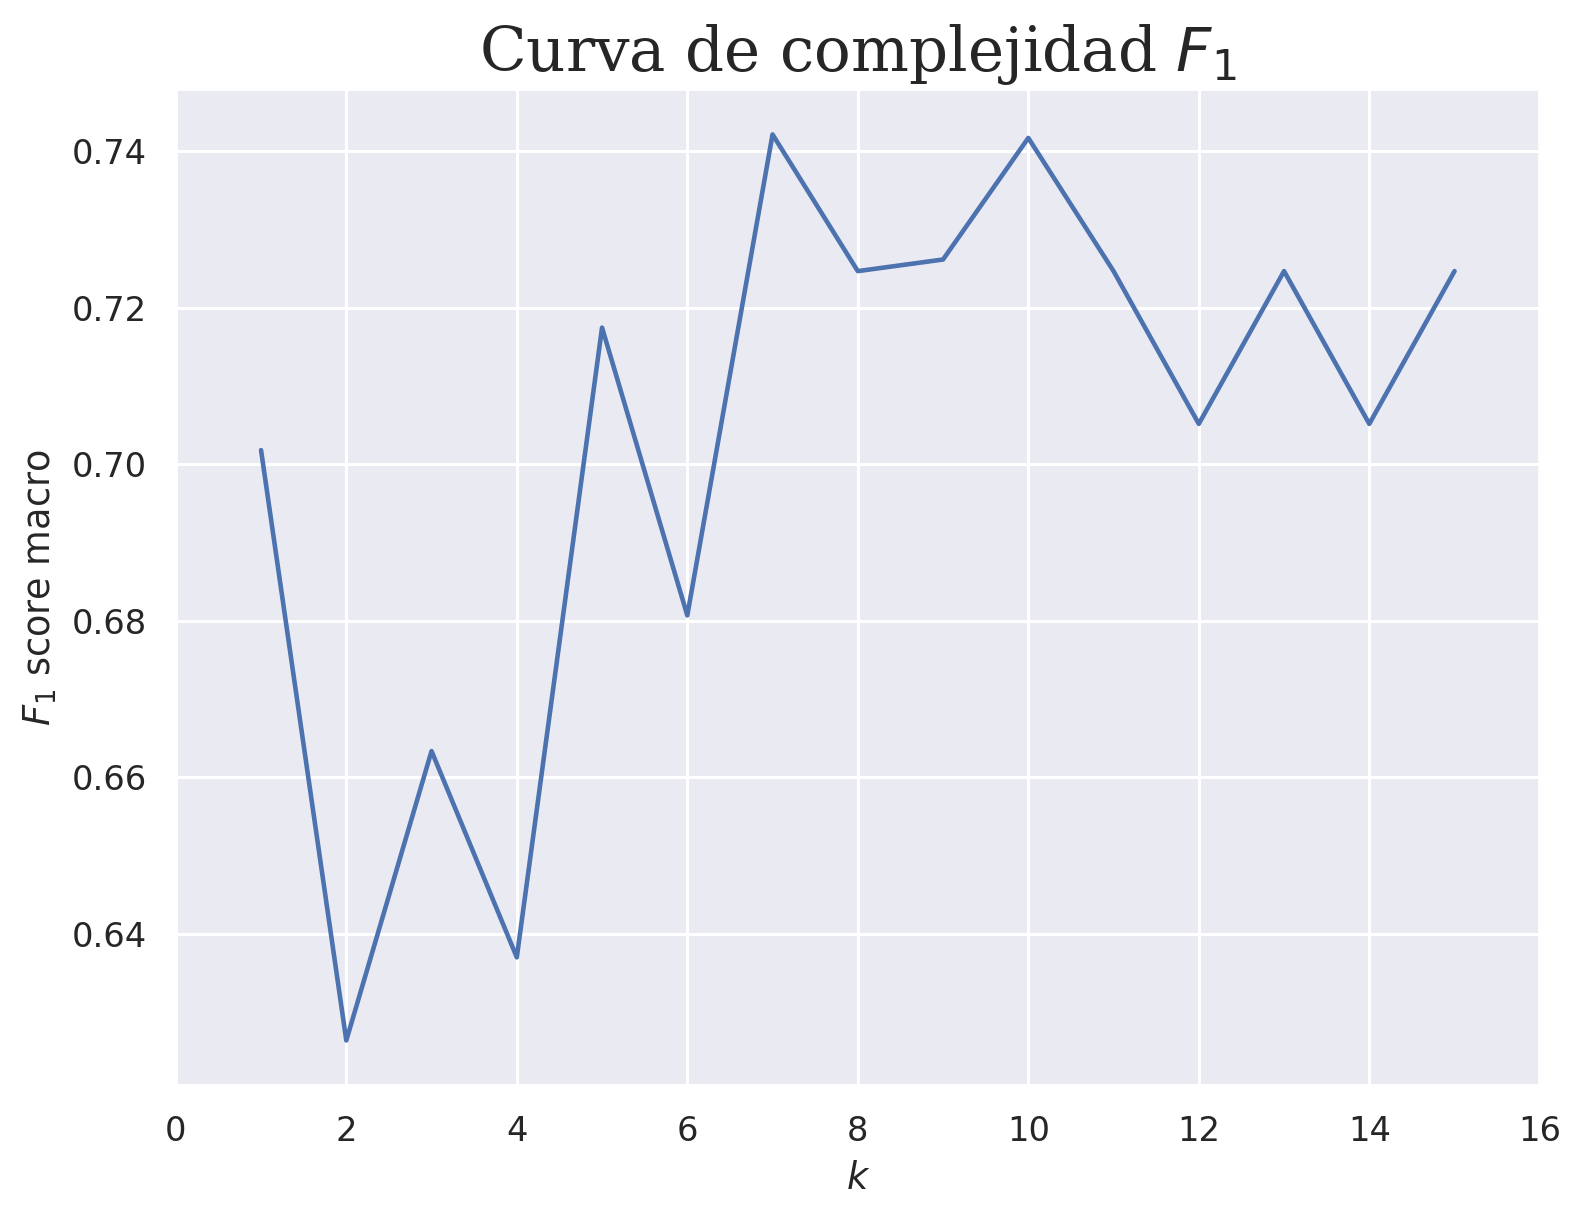

In [28]:
#TEST_CELL
#@title { run: "auto" }
#@markdown **Celda de pruebas:** Ejecute esta celda para generar una visualización de la curva de complejidad obtenida a partir del conjunto de datos *Wine*. Esta función utiliza el resultado de las funciones anteriores para el entrenamiento del modelo.

#@markdown A continuación graficamos los valores del **_F1 macro_** para los diferentes valores del hiperparámetro **`k`**:

max_k = 15 

# 1. Cargar Wine en formato X, y
X8, y8 = load_X_y()
assert isinstance(X8, np.ndarray) and isinstance(y8, np.ndarray), "Ej 1. Revise el ejercicio 1."

# 3. Generar particiones de entrenamiento y prueba con estratificación
X8_train, X8_test, y8_train, y8_test = get_stratified_split (X8, y8)
assert np.all([isinstance(par, np.ndarray) 
       for par in (X8_train, X8_test, y8_train, y8_test)]), "Ej 3. Revise el ejercicio 3."

k_vals = np.arange(1, max_k + 1)
f1_scores = curva_complejidad_F1_macro(X8_train, y8_train, X8_test, y8_test, k_vals)
assert (f1_scores is not None and len(f1_scores) == len(k_vals)
        ), "Ej 8. El arreglo retornado no es válido."
plt.plot(k_vals, f1_scores);
plt.xlabel("$k$")
plt.ylabel("$F_1$ score macro")
plt.xlim([0, max_k + 1])
plt.title("Curva de complejidad $F_1$", fontdict=dict(family = 'serif', size = 20));


**Salida esperada**

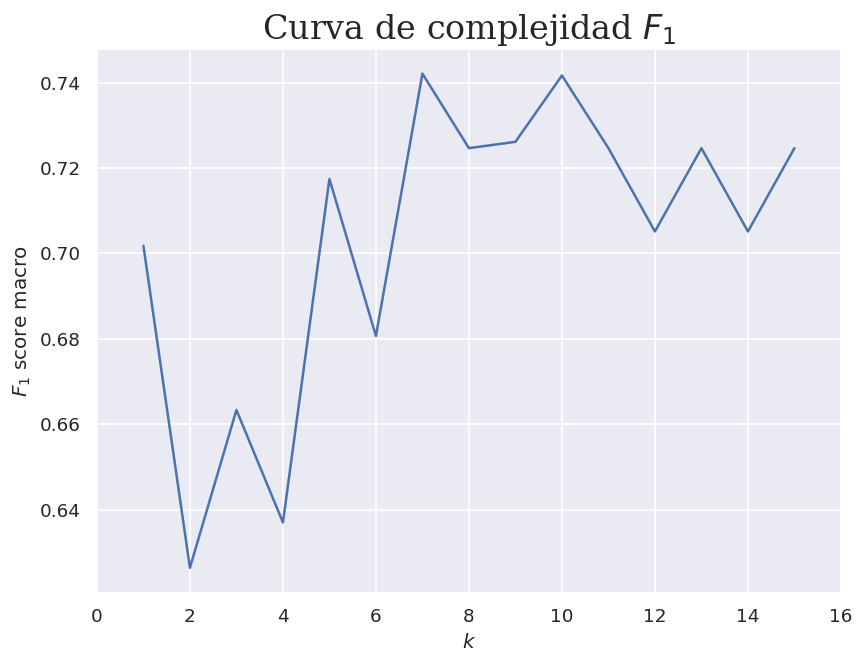

¿Qué valor de **`k`** escogería? Recuerde que el $F_1$ _score_ es una métrica que queremos **maximizar**.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>


* Para cada valor de **`k_vals`** deberá generar un clasificador nuevo y realizar una predicción a partir de la partición de prueba de la matriz de datos de entrada para calcular la métrica respectiva. Se le recomienda usar la función del ejercicio $4$ para entrenar el modelo y la función del ejercicio $7$ para obtener el valor de la métrica y almacenarlo tras cada iteración.


## **9. Estimación de la complejidad en regresión**
---
Elegir un hiperparámetro adecuado también depende de la elección adecuada de la métrica de desempeño usada como valor de referencia. Para elegir la métrica adecuada es importante entender la naturaleza del problema y distinguir si es un problema de clasificación o de regresión. 

En este último ejercicio deberá desarrollar la función **`curva_complejidad_regresion`**, que reciba datos de entrenamiento, datos de prueba y una lista de valores para el hiperparámetro **`k`** del algoritmo de regresión de los $k$ vecinos más cercanos, y retorne una lista con los valores el **RMSE** de prueba para cada uno de los regresores con los diferentes valores de **`k`**.

**Entrada**:


* **`X_train`**: arreglo de *NumPy* con tamaño $(n, m)$ con la partición de entrenamiento de **`X`**.
* **`X_test`**:  arreglo de *NumPy* con tamaño $(t, m)$ con la partición de prueba de **`X`**.
* **`y_train`**: arreglo de *NumPy* con tamaño $(n,)$ con la partición de entrenamiento de **`y`**.
* **`y_test`**:  arreglo de *NumPy* con tamaño $(t,)$ con la partición de prueba de **`y`**.
* **`k_vals`**: lista de números enteros de tamaño $K$ con los hiperparámetros $k$ del regresor *KNN*.


**Salida**:
* **`rmse_scores`**: lista o arreglo de *NumPy* de tamaño $K$ con el resultado de la métrica **RMSE** obtenida de la evaluación del desempeño del modelo de cada iteración. El orden debe corresponder al orden de los hiperparámetros **`k_vals`**.


In [31]:
# FUNCIÓN CALIFICADA curva_complejidad_regresion:

# Módulo necesario para calcular la métrica RSME.
from sklearn import metrics

# Módulo necesario para declarar el modelo de regresión KNN.
from sklearn import neighbors

def curva_complejidad_regresion(X_train, y_train, X_test, y_test, k_vals):
    """
     X_train: arreglo de NumPy de tamaño (n, m) con las características de entrenamiento.
     y_train: arreglo de NumPy de tamaño (n,) con las etiquetas de clase de entrenamiento.
     X_test: arreglo de NumPy de tamaño (n, m) con las características de prueba.
     y_test: arreglo de NumPy de tamaño (n,) con las etiquetas de prueba.
     k_vals: lista de valores del hiperparámetro k del regresor KNN.
    Retorna:
     rmse_scores: lista con el RMSE para cada regresor entrenado con los valores de k_vals.    
    """
    ### ESCRIBA SU CÓDIGO AQUÍ ### (~ 5-6 líneas de código)
    rmse_scores = []
    for k in k_vals:
      model = neighbors.KNeighborsRegressor(n_neighbors=k)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      rmse_scores.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

    ### FIN DEL CÓDIGO ###
    return rmse_scores

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

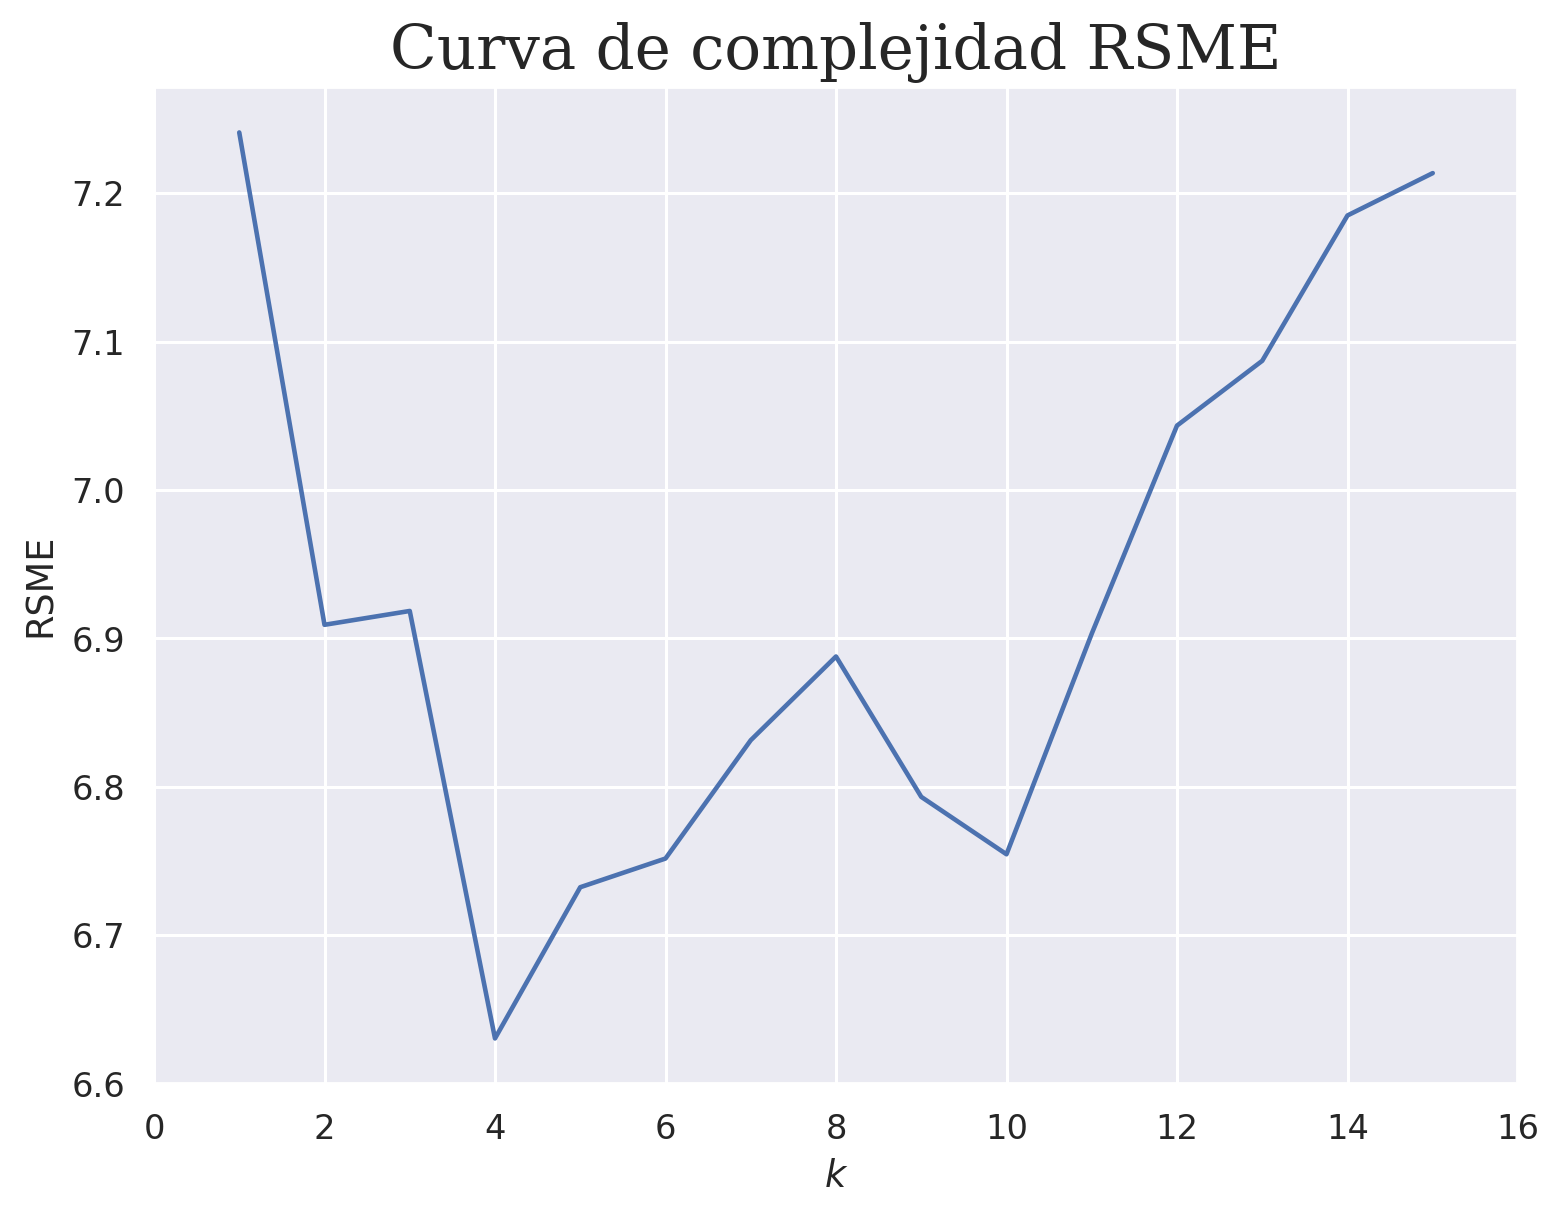

In [32]:
#TEST_CELL
#@title { run: "auto" }
#@markdown **Celda de pruebas:** Ejecute esta celda para generar una visualización de la curva de complejidad obtenida a partir del conjunto de datos *Boston* (regresión). Esta función utiliza el resultado de las funciones anteriores para el entrenamiento del modelo.

#@markdown A continuación graficamos los valores del **RSME** para los diferentes valores del hiperparámetro **`k`**:

max_k = 15 

X9, y9 = datasets.load_boston(return_X_y=True)
X9_train, X9_test, y9_train, y9_test = model_selection.train_test_split(X9, y9, test_size=0.3, random_state=23)
k_vals = np.arange(1, max_k + 1)
rsme_scores = curva_complejidad_regresion(X9_train, y9_train, X9_test, y9_test, k_vals)

assert (rsme_scores is not None and len(rsme_scores) == len(k_vals)
        ), "Ej 9. El arreglo 'scores' retornado no es válido."

plt.plot(k_vals, rsme_scores);
plt.xlabel("$k$")
plt.ylabel("RSME")
plt.xlim([0, max_k + 1])
plt.title("Curva de complejidad RSME", fontdict=dict(family = 'serif', size = 20));


**Salida esperada:**

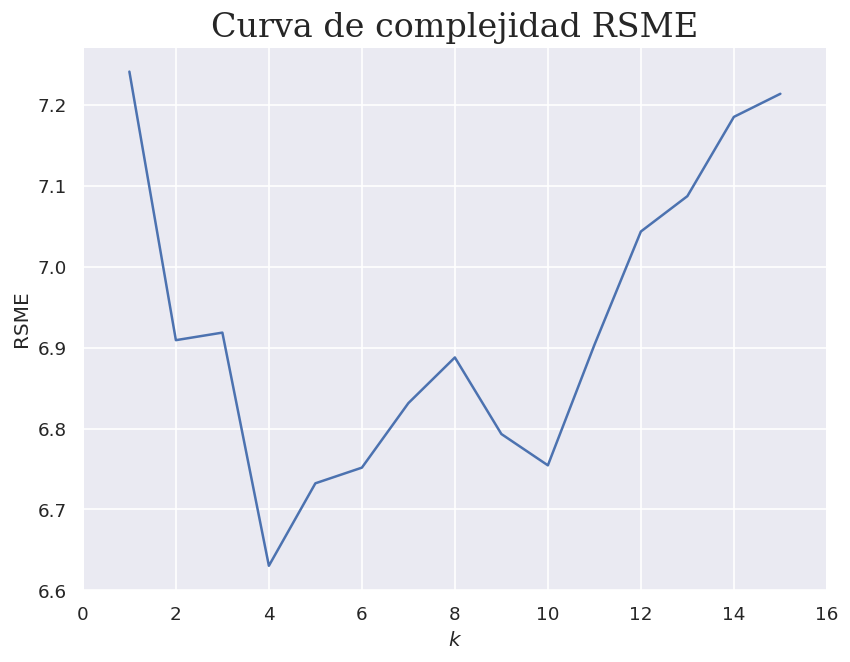

¿Qué valor de $k$ escogería? Recuerde que el **RMSE** es una métrica que queremos **minimizar**.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>


* Para cada valor de **`k_vals`** deberá generar un **regresor** nuevo y realizar una predicción a partir de la partición de prueba de la matriz de datos de entrada para calcular la métrica respectiva.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>


* Deberá declarar el modelo de regresión con el constructor **`KNeighborsRegressor`** del módulo **`sklearn.neighbors`**.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 3</b></font>
</summary>


* La métrica corresponde a la raíz cuadrada del valor obtenido con el método **`mean_squared_error`** del módulo **`sklearn.metrics`**, a partir de la etiqueta de valores reales **`y_test`** y el vector de valores predichos a partir del arreglo **`X_test`**.

**¡Felicitaciones!** Ha terminado la tarea de la Unidad 2. ¡Buen trabajo!

## **Entrega**

Para entregar el notebook por favor haga lo siguiente:
1. Descargue el notebook (`Archivo` -> `Descargar .ipynb`).
2. Ingrese a Moodle.
3. Realice el envío del *notebook* que descargó en la tarea (o quiz) correspondiente.
4. Recuerde que si tiene algún error, puede hacer múltiples intentos de envío en UNCode. 

## **Créditos**

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistentes docentes:** 
  * Miguel Angel Ortiz Marín
  * Alberto Nicolai Romero Martínez

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*